# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('advertising.csv')
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

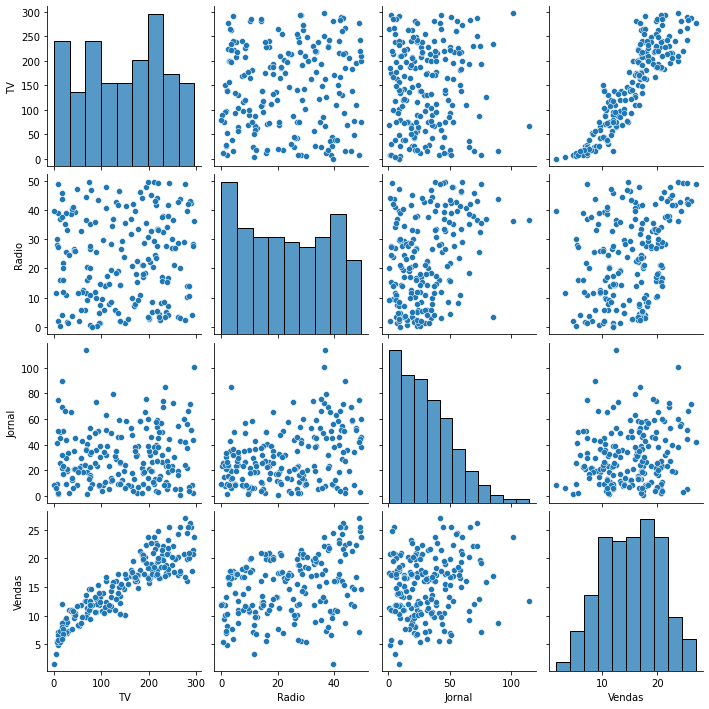

In [6]:
sns.pairplot(df)
plt.show()

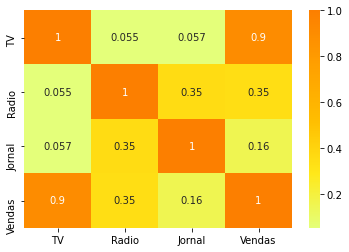

In [7]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [9]:
x = df.drop('Vendas', axis=1)
y = df['Vendas']

In [10]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [13]:
#treino da IA
linear = LinearRegression()
linear.fit(x_treino, y_treino)

regressao = RandomForestRegressor()
regressao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [14]:
#teste de IA
teste_linear = linear.predict(x_teste)
teste_regressao = regressao.predict(x_teste)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [17]:
#avaliações
r2_lin = metrics.r2_score(y_teste, teste_linear)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_teste, teste_linear))

print(f'R² da Regressão Linear: {r2_lin}')
print(f'RSME da Regressão Linear: {rmse_lin}')

r2_rf = metrics.r2_score(y_teste, teste_regressao)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_teste, teste_regressao))

print(f'R² da Regressão Linear: {r2_rf}')
print(f'RSME da Regressão Linear: {rmse_rf}')

R² da Regressão Linear: 0.9071151423684274
RSME da Regressão Linear: 1.539694765603123
R² da Regressão Linear: 0.9672603304004168
RSME da Regressão Linear: 0.9141118093537577


#### Visualização Gráfica das Previsões

In [41]:
df_resultado = pd.DataFrame()
display(df_resultado)

""


In [42]:
df_resultado['y_teste'] = y_teste
df_resultado['y_previsao_rf'] = teste_regressao
df_resultado['y_previsao_linear'] = teste_linear
df_resultado = df_resultado.reset_index(drop=True)

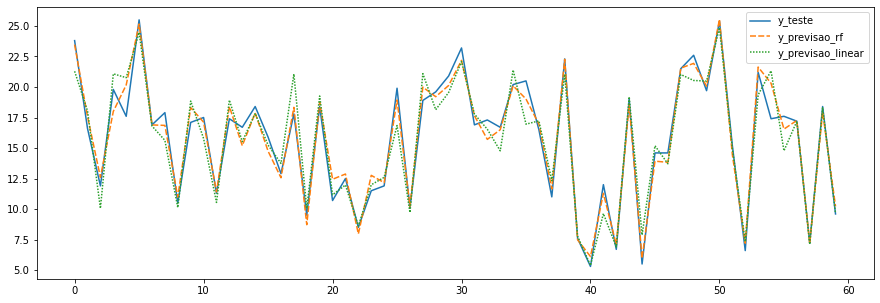

,y_teste,y_previsao_rf,y_previsao_linear
0,23.8,23.473,21.288161
1,16.6,17.586,18.042132
2,11.9,12.607,10.059590
3,19.8,17.999,21.082241
4,17.6,20.171,20.764760
5,25.5,25.163,24.471874
6,16.9,16.895,16.806436
7,17.9,16.854,15.628857
8,10.5,10.978,10.124799
9,17.1,18.316,18.846019


In [43]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

#### Qual a importância de cada variável para as vendas?

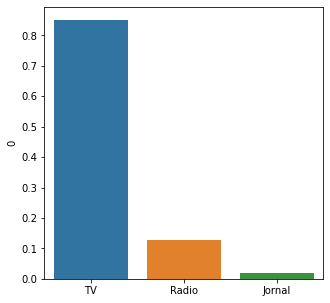

In [44]:
importancia = pd.DataFrame(regressao.feature_importances_, x_treino.columns)
plt.figure(figsize=(5,5))
sns.barplot(x=importancia.index, y=importancia[0])
plt.show()